# ISAT225 Final Project 
## How to Analyze and Visualize Covid-19 Data

###### Covid-19 (AKA SARS CoV-2) is a virus that began in December 2019 originating in the Wuhan region of China. It is one of the seven coronaviruses that can infect humans, the name coming from the protein spikes covering them that looks like a crown, or corona in latin. Out of these seven, four of them infect the nose and throat causing flu-like symptoms, and two infect the lungs causing more severe illness. The newest one, however, has features of both, spreading easily and impacting the lungs. 

In [3]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
df = pandas.read_csv('s3://isat252-liu/csv')     #Reading in the file
df[:5]    #Running it

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,09/06/2020,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
1,08/06/2020,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
2,07/06/2020,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
3,06/06/2020,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia
4,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia


## Looking at the number of cases and deaths by continent

In [7]:
cases_by_continent = df.groupby('continentExp').sum()['cases']    #The total number of cases per continent
cases_by_continent[:]

continentExp
Africa      196570
America    3403398
Asia       1375372
Europe     2084509
Oceania       8733
Other          696
Name: cases, dtype: int64

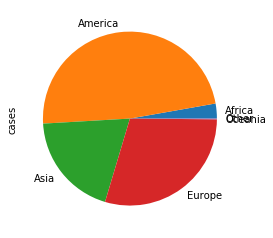

In [14]:
cases_by_continent.plot.pie()

In [5]:
deaths_by_continent = df.groupby('continentExp').sum()['deaths']      #The total number of deaths per continent
deaths_by_continent[:]

continentExp
Africa       5346
America    185311
Asia        35407
Europe     179385
Oceania       131
Other           7
Name: deaths, dtype: int64

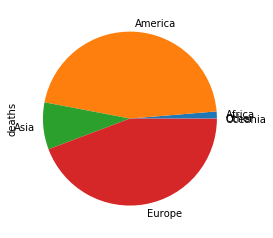

In [17]:
deaths_by_continent.plot.pie()

In [8]:
death_percentage_of_cases_by_continent = deaths_by_continent/cases_by_continent   #Percentage of deaths based on cases
death_percentage_of_cases_by_continent

continentExp
Africa     0.027196
America    0.054449
Asia       0.025744
Europe     0.086056
Oceania    0.015001
Other      0.010057
dtype: float64

###### It looks like Europe and America have the largest percentage of deaths from Covid-19 while Oceanian and Asia have far fewer. America 

## Looking at the countries with the highest death percentages as well as the lowest.

In [28]:
death_percentages = df.groupby('countriesAndTerritories').sum()['deaths']/df.groupby('countriesAndTerritories').sum()['cases']

In [43]:
death_percentages.describe()

count    210.000000
mean       0.034977
std        0.038451
min        0.000000
25%        0.008410
50%        0.024221
75%        0.048723
max        0.225806
dtype: float64

In [45]:
death_percentages.sort_values

<bound method Series.sort_values of countriesAndTerritories
Afghanistan                          0.017641
Albania                              0.026920
Algeria                              0.069654
Andorra                              0.059859
Angola                               0.043478
Anguilla                             0.000000
Antigua_and_Barbuda                  0.115385
Argentina                            0.029356
Armenia                              0.015835
Aruba                                0.029703
Australia                            0.014040
Austria                              0.039789
Azerbaijan                           0.011808
Bahamas                              0.106796
Bahrain                              0.001686
Bangladesh                           0.013576
Barbados                             0.076087
Belarus                              0.005581
Belgium                              0.161909
Belize                               0.105263
Benin               

In [40]:
countries_no_death = death_percentages.loc[death_percentages == 0]
countries_no_death[:]

countriesAndTerritories
Anguilla                             0.0
Bhutan                               0.0
Bonaire, Saint Eustatius and Saba    0.0
Cambodia                             0.0
Dominica                             0.0
Eritrea                              0.0
Falkland_Islands_(Malvinas)          0.0
Faroe_Islands                        0.0
Fiji                                 0.0
French_Polynesia                     0.0
Gibraltar                            0.0
Greenland                            0.0
Grenada                              0.0
Holy_See                             0.0
Laos                                 0.0
Lesotho                              0.0
Mongolia                             0.0
Namibia                              0.0
New_Caledonia                        0.0
Papua_New_Guinea                     0.0
Saint_Kitts_and_Nevis                0.0
Saint_Lucia                          0.0
Saint_Vincent_and_the_Grenadines     0.0
Seychelles                       

In [47]:
# countries_no_death.groupby('continentExp').count_values

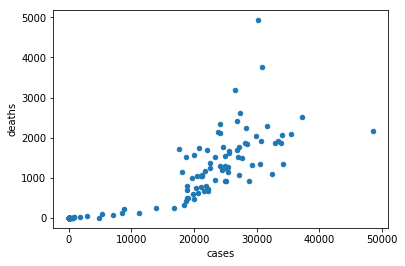

In [26]:
usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']
usa_data.plot.scatter(x='cases',y='deaths')
cases_in_usa = df.groupby()

## Comparing cases each day by territory/country

In [11]:
# cases_in_afghanistan = df.loc[df['countriesAndTerritories'] == 'Afghanistan' ]
# cases_in_afghanistan.describe()

In [22]:
cases_in_oceania = df.loc[df['continentExp'] == 'Oceania' ]
cases_in_oceania.groupby('countriesAndTerritories').sum()['cases']

countriesAndTerritories
Australia                   7265
Fiji                          18
French_Polynesia              60
Guam                         180
New_Caledonia                 20
New_Zealand                 1154
Northern_Mariana_Islands      28
Papua_New_Guinea               8
Name: cases, dtype: int64

In [9]:
cases_in_america = df.loc[df['continentExp'] == 'America' ]
cases_in_america.groupby('countriesAndTerritories').sum()['cases']

countriesAndTerritories
Anguilla                                   3
Antigua_and_Barbuda                       26
Argentina                              23607
Aruba                                    101
Bahamas                                  103
Barbados                                  92
Belize                                    19
Bermuda                                  141
Bolivia                                13949
Bonaire, Saint Eustatius and Saba          7
Brazil                                691758
British_Virgin_Islands                     8
Canada                                 96233
Cayman_Islands                           171
Chile                                 138846
Colombia                               40719
Costa_Rica                              1342
Cuba                                    2200
Curaçao                                   21
Dominica                                  18
Dominican_Republic                     20126
Ecuador                        

In [10]:
cases_in_america.plot.pie()

ValueError: pie requires either y column or 'subplots=True'

In [12]:
deaths_in_america = df.loc[df['continentExp'] == 'America' ]
deaths_in_america.groupby('countriesAndTerritories').sum()['deaths']

countriesAndTerritories
Anguilla                                  0
Antigua_and_Barbuda                       3
Argentina                               693
Aruba                                     3
Bahamas                                  11
Barbados                                  7
Belize                                    2
Bermuda                                   9
Bolivia                                 475
Bonaire, Saint Eustatius and Saba         0
Brazil                                36455
British_Virgin_Islands                    1
Canada                                 7835
Cayman_Islands                            1
Chile                                  2264
Colombia                               1308
Costa_Rica                               10
Cuba                                     83
Curaçao                                   1
Dominica                                  0
Dominican_Republic                      539
Ecuador                                3642
El_Salva